
# <span style="color:rgb(213,80,0)">**Reaction\-Diffusion in a Catalytic Reactor**</span>

Imagine a one\-dimensional tube (a plug flow reactor) of length **L = 1 meter**. The tube is filled with a catalyst that promotes a chemical reaction. A chemical species 'A' flows into the tube and is consumed by a first\-order reaction as it diffuses along the length of the tube.


We want to model the concentration of species 'A', denoted by u(x,t), along the reactor over time.

<p style="text-align:left">
   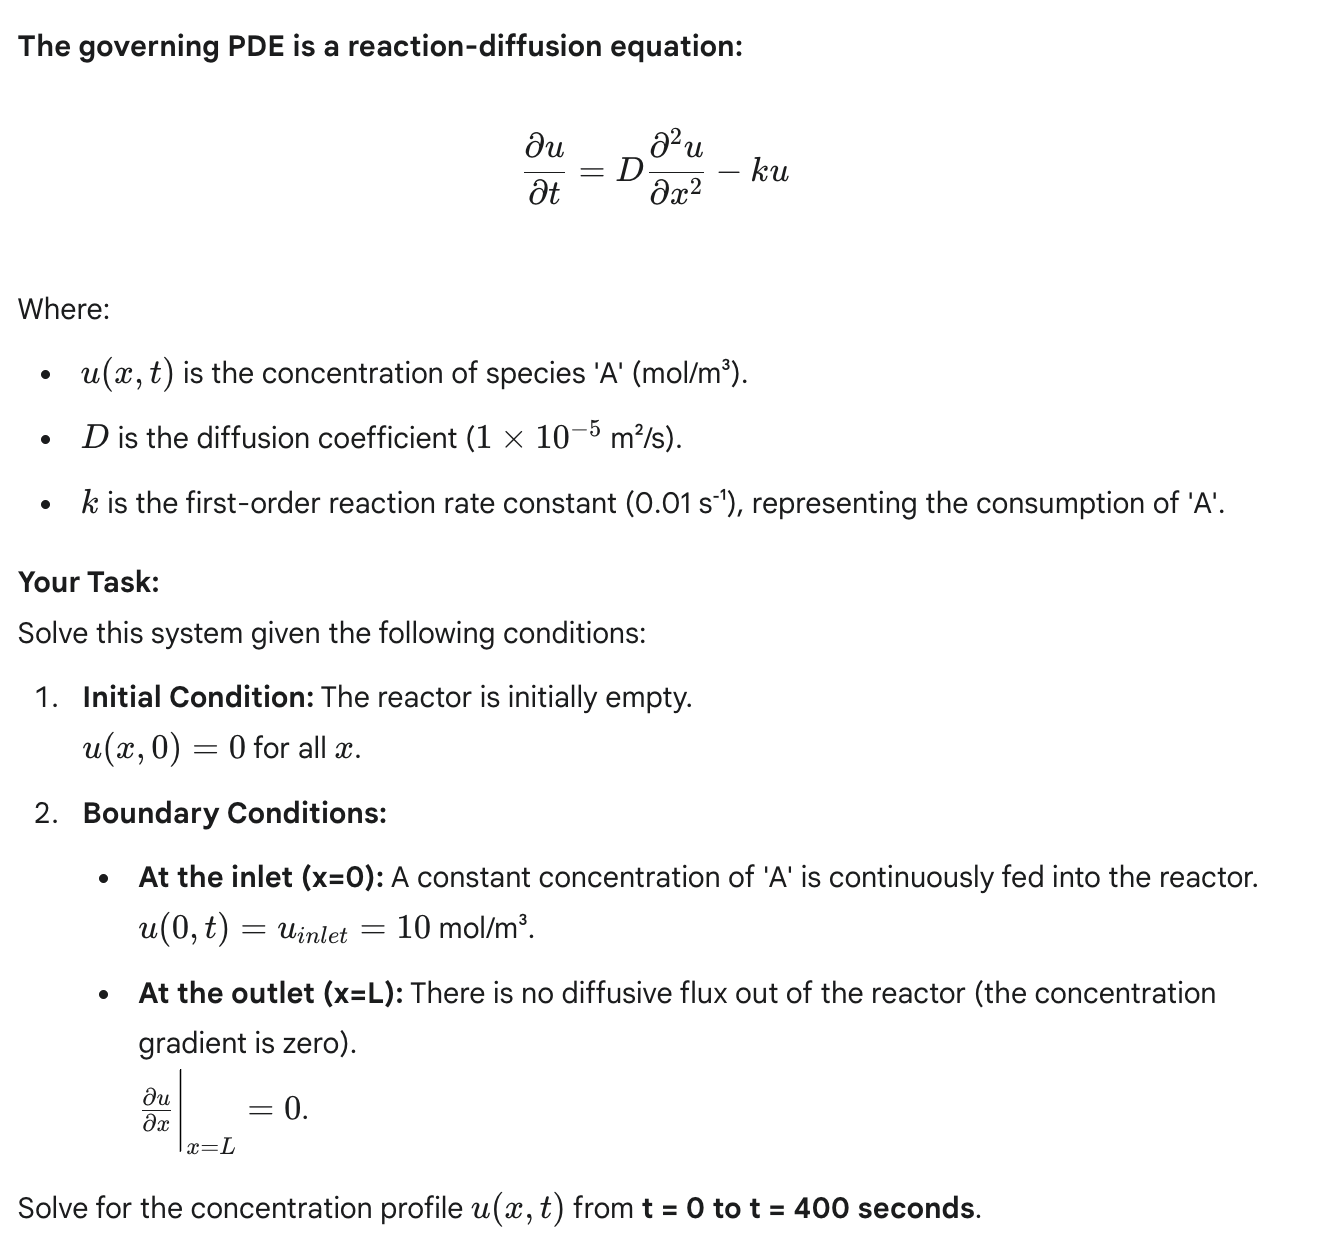
</p>



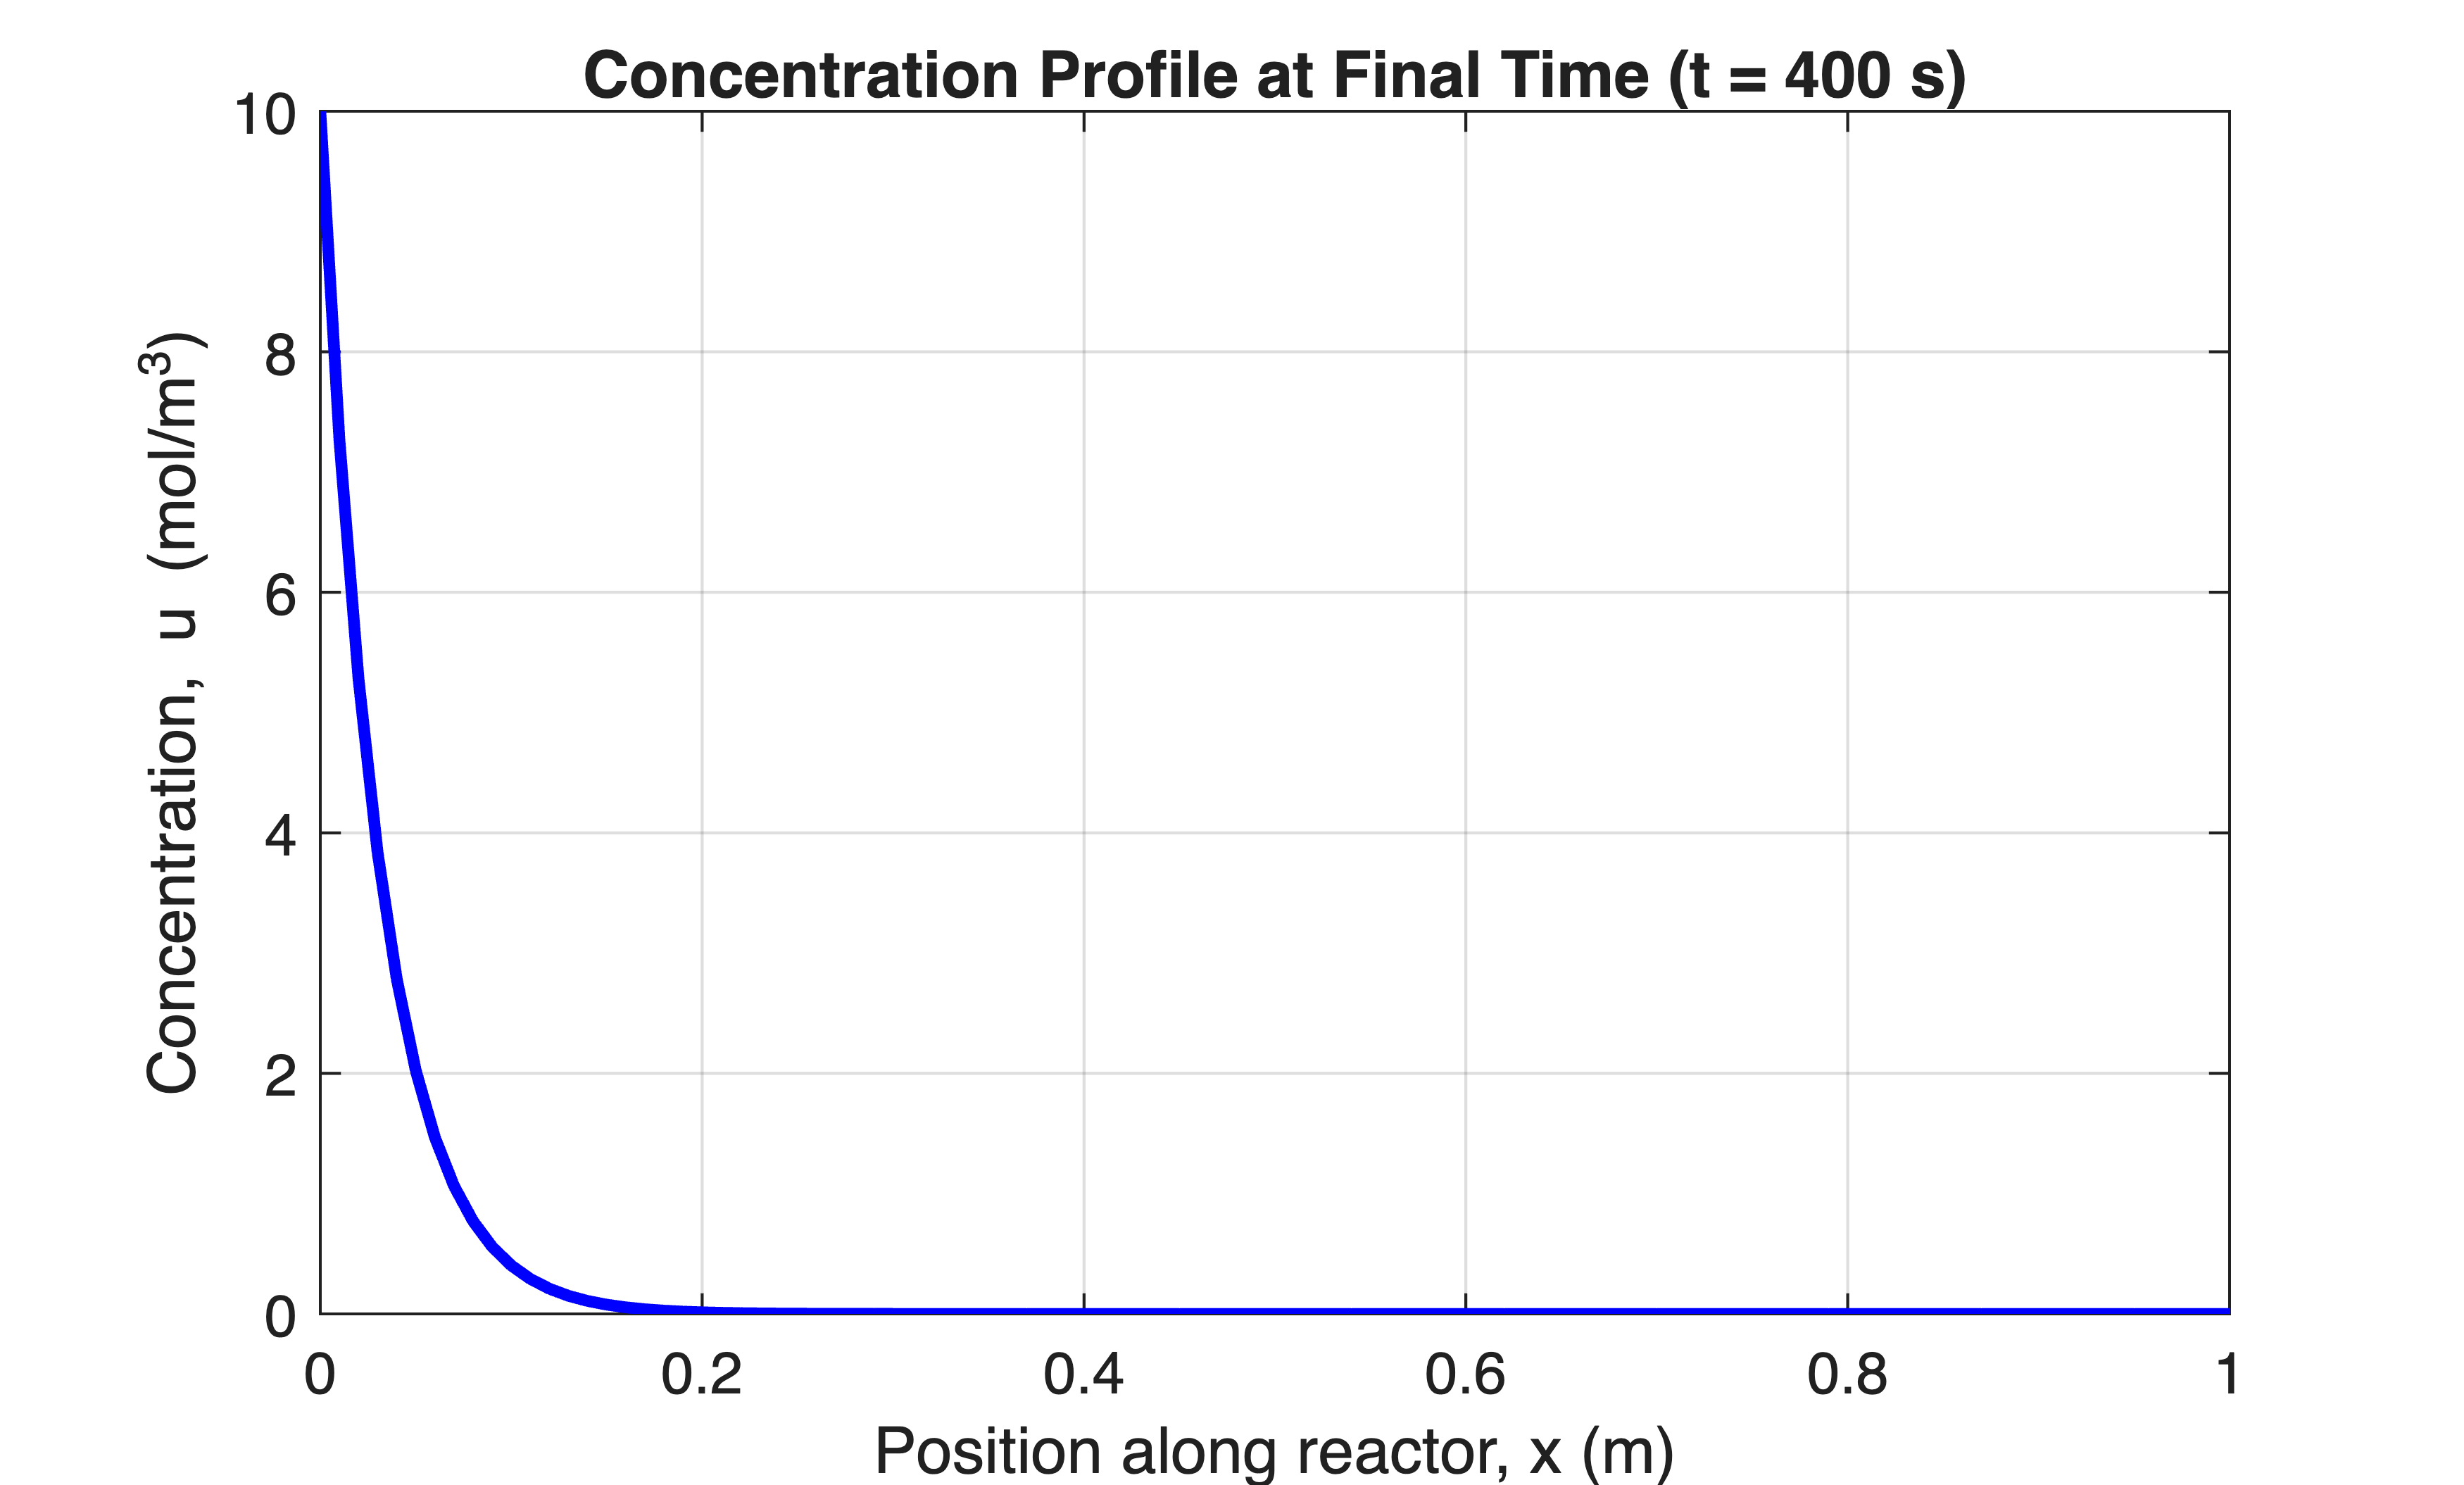

In [1]:
clc; clearvars; close all;

function [c,f,s] = diffPDE(x,t,u,dudx)
    d = 1 * 10^(-5);
    k = 0.01;
    c = 1;
    f = d * dudx;
    s = -k * u;
end

function u0 = diffIC(x)
    u0 = 0;
end

function [pl,ql,pr,qr] = diffBC(xl,ul,xr,ur,t)
    pl = ul-10;
    ql = 0;
    pr = 0;
    qr = 1 - 0;
end

m = 0;
L = 1;
xmesh = linspace(0,L,101);
tspan = linspace(0,400,51);

sol = pdepe(m, @diffPDE, @diffIC, @diffBC, xmesh, tspan);

u = sol(:,:,1);

figure;
plot(xmesh, u(end, :), 'b-', 'LineWidth', 2);
title(['Concentration Profile at Final Time (t = ', num2str(tspan(end)), ' s)']);
xlabel('Position along reactor, x (m)');
ylabel('Concentration, u (mol/m^3)');
grid on;
axis([0 L 0 10]);


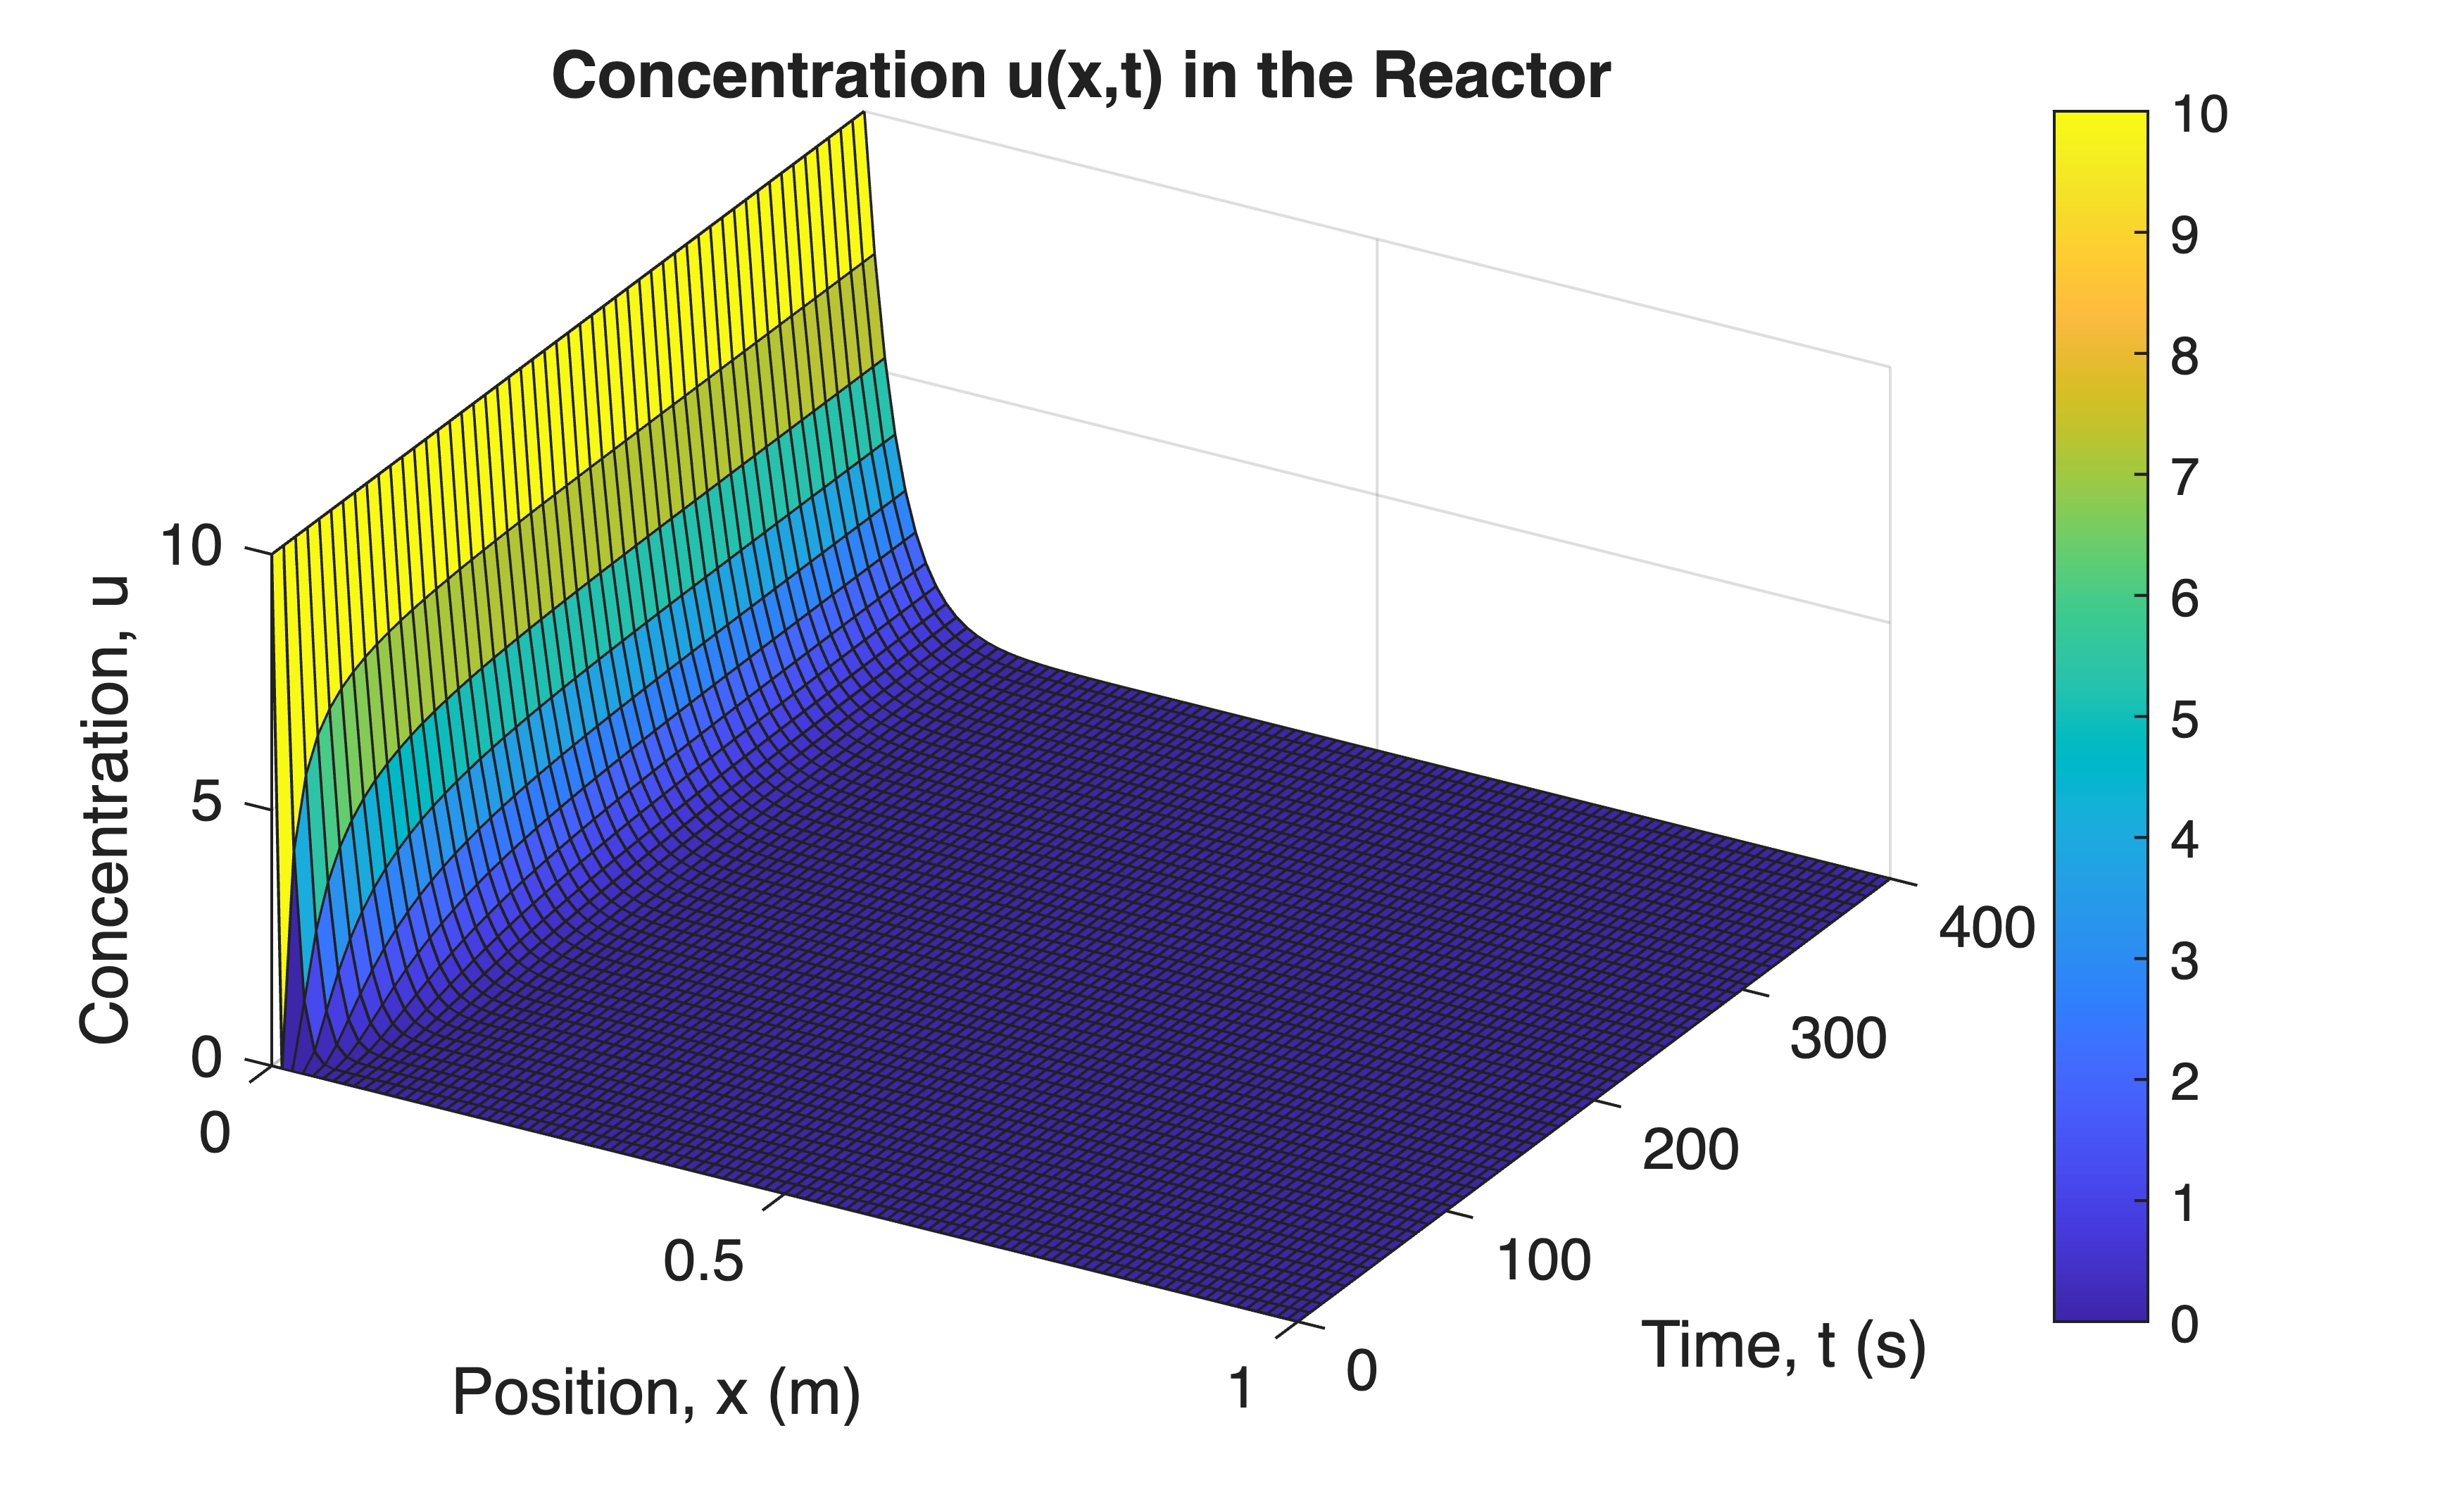

In [2]:

% Surface plot to show evolution over time and space
figure;
surf(xmesh, tspan, u);
title('Concentration u(x,t) in the Reactor');
xlabel('Position, x (m)');
ylabel('Time, t (s)');
zlabel('Concentration, u');
colorbar;
view(30, 45); % Adjust viewing angle